# YOLO v3 Object Detection

Let's see how to use the state of the art in object detection! Please make sure to watch the video, there is no code along here, since we can't reasonably train the YOLOv3 network ourself, instead we will use a pre-established version.

CODE SOURCE: https://github.com/xiaochus/YOLOv3

REFERENCE (for original YOLOv3): 

        @article{YOLOv3,  
              title={YOLOv3: An Incremental Improvement},  
              author={J Redmon, A Farhadi },
              year={2018} 
--------
----------
## YOU MUST WATCH THE VIDEO LECTURE TO PROPERLY SET UP THE MODEL AND WEIGHTS. THIS NOTEBOOK WON'T WORK UNLESS YOU FOLLOW THE EXACT SET UP SHOWN IN THE VIDEO LECTURE.
-------
-------

In [1]:
import os
import time
import cv2
import numpy as np
from model.yolo_model import YOLO

Using TensorFlow backend.


In [2]:
def process_image(img):
    """Resize, reduce and expand image.

    # Argument:
        img: original image.

    # Returns
        image: ndarray(64, 64, 3), processed image.
    """
    image = cv2.resize(img, (416, 416),
                       interpolation=cv2.INTER_CUBIC)
    image = np.array(image, dtype='float32')
    image /= 255.
    image = np.expand_dims(image, axis=0)

    return image

In [15]:
def get_classes(file):
    """Get classes name.

    # Argument:
        file: classes name for database.

    # Returns
        class_names: List, classes name.

    """
    with open(file) as f:
        class_names = f.readlines()
        print(class_names)
    class_names = [c.strip() for c in class_names]

    return class_names

In [4]:
def draw(image, boxes, scores, classes, all_classes):
    """Draw the boxes on the image.

    # Argument:
        image: original image.
        boxes: ndarray, boxes of objects.
        classes: ndarray, classes of objects.
        scores: ndarray, scores of objects.
        all_classes: all classes name.
    """
    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box

        top = max(0, np.floor(x + 0.5).astype(int))
        left = max(0, np.floor(y + 0.5).astype(int))
        right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))

        cv2.rectangle(image, (top, left), (right, bottom), (255, 0, 0), 2)
        cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                    (top, left - 6),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 0, 255), 1,
                    cv2.LINE_AA)

        print('class: {0}, score: {1:.2f}'.format(all_classes[cl], score))
        print('box coordinate x,y,w,h: {0}'.format(box))

    print()

In [5]:
def detect_image(image, yolo, all_classes):
    """Use yolo v3 to detect images.

    # Argument:
        image: original image.
        yolo: YOLO, yolo model.
        all_classes: all classes name.

    # Returns:
        image: processed image.
    """
    pimage = process_image(image)

    start = time.time()
    boxes, classes, scores = yolo.predict(pimage, image.shape)
    end = time.time()

    print('time: {0:.2f}s'.format(end - start))

    if boxes is not None:
        draw(image, boxes, scores, classes, all_classes)

    return image

In [6]:
def detect_video(video, yolo, all_classes):
    """Use yolo v3 to detect video.

    # Argument:
        video: video file.
        yolo: YOLO, yolo model.
        all_classes: all classes name.
    """
    video_path = os.path.join("videos", "test", video)
    camera = cv2.VideoCapture(video_path)
    cv2.namedWindow("detection", cv2.WINDOW_AUTOSIZE)

    # Prepare for saving the detected video
    sz = (int(camera.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    fourcc = cv2.VideoWriter_fourcc(*'mpeg')

    
    vout = cv2.VideoWriter()
    vout.open(os.path.join("videos", "res", video), fourcc, 20, sz, True)

    while True:
        res, frame = camera.read()

        if not res:
            break

        image = detect_image(frame, yolo, all_classes)
        cv2.imshow("detection", image)

        # Save the video frame by frame
        vout.write(image)

        if cv2.waitKey(110) & 0xff == 27:
                break

    vout.release()
    camera.release()
    

In [16]:
yolo = YOLO(0.6, 0.5)
file = './data/coco_classes.txt'
all_classes = get_classes(file)

['person\n', 'bicycle\n', 'car\n', 'motorbike\n', 'aeroplane\n', 'bus\n', 'train\n', 'truck\n', 'boat\n', 'traffic light\n', 'fire hydrant\n', 'stop sign\n', 'parking meter\n', 'bench\n', 'bird\n', 'cat\n', 'dog\n', 'horse\n', 'sheep\n', 'cow\n', 'elephant\n', 'bear\n', 'zebra\n', 'giraffe\n', 'backpack\n', 'umbrella\n', 'handbag\n', 'tie\n', 'suitcase\n', 'frisbee\n', 'skis\n', 'snowboard\n', 'sports ball\n', 'kite\n', 'baseball bat\n', 'baseball glove\n', 'skateboard\n', 'surfboard\n', 'tennis racket\n', 'bottle\n', 'wine glass\n', 'cup\n', 'fork\n', 'knife\n', 'spoon\n', 'bowl\n', 'banana\n', 'apple\n', 'sandwich\n', 'orange\n', 'broccoli\n', 'carrot\n', 'hot dog\n', 'pizza\n', 'donut\n', 'cake\n', 'chair\n', 'sofa\n', 'pottedplant\n', 'bed\n', 'diningtable\n', 'toilet\n', 'tvmonitor\n', 'laptop\n', 'mouse\n', 'remote\n', 'keyboard\n', 'cell phone\n', 'microwave\n', 'oven\n', 'toaster\n', 'sink\n', 'refrigerator\n', 'book\n', 'clock\n', 'vase\n', 'scissors\n', 'teddy bear\n', 'hair 

### Detecting Images

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

time: 3.37s
class: bicycle, score: 0.87
box coordinate x,y,w,h: [2810.36818027 1996.17812729 1357.65856504  718.00525546]
class: bicycle, score: 0.66
box coordinate x,y,w,h: [ 827.26711035 1955.17666531 1226.85179114  807.29721308]



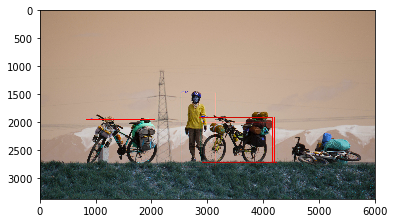

In [9]:
image = cv2.imread('./images/res/jingxiang-gao-489454-unsplash.jpg')
image = detect_image(image, yolo, all_classes)
cv2.imwrite('./images/res/jingxiang-gao-489454-unsplash.jpg', image)
plt.imshow(image)

time: 3.54s
class: person, score: 0.82
box coordinate x,y,w,h: [385.53664041 126.59044421 100.81685686 274.34666574]
class: car, score: 0.98
box coordinate x,y,w,h: [124.35388541 166.06647956 659.61643839 229.97512612]



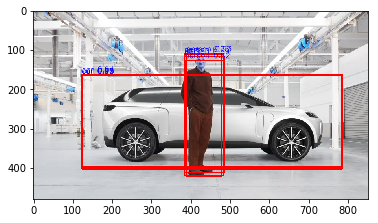

In [10]:
image = cv2.imread('./images/people_car.png')
image = detect_image(image, yolo, all_classes)
cv2.imwrite('./images/people_car.png', image)
plt.imshow(image)

# Detecting on Video

In [18]:
# # detect videos one at a time in videos/test folder    
# video = 'library1.mp4'
# detect_video(video, yolo, all_classes)

In [20]:
# cap = cv2.VideoCapture('../../DATA/slow_traffic_small.mp4')

# ret, frame = cap.read()

# yolo_frame = detect_image(frame, yolo, all_classes)

# cv2.imshow('frame', yolo_frame)

# while True:
    
#     ret, frame = cap.read()
    
#     yolo_frame = detect_image(frame, yolo, all_classes)
#     cv2.imshow('frame', frame)
    
#     k = cv2.waitKey(30) & 0xFF
#     if k == 27:
#         break

# cv2.destroyAllWindows()
# cap.release()

time: 11.11s
